In [13]:
from pydantic import BaseModel
from typing import Literal
from datetime import datetime
from langgraph.graph import StateGraph, START,END
from IPython.display import display, Image
import random

In [8]:
class PydanticState(BaseModel):
    """
    Pydantic model for the state of the graph.
    """
    name: str
    game: Literal["cricket", "badminton"] = "cricket"
    timestamp: datetime = datetime.now()

In [9]:
def play_game(state: PydanticState):
    print("-------------play game node called------------")
    return {"name": state.name + " wants to play"}

def play_cricket(state: PydanticState):
    print("-------------play cricket node called------------")
    return {"name": state.name + " cricket", "game": "cricket"}

def play_badminton(state: PydanticState):
    print("-------------play badminton node called------------")
    return {"name": state.name + " badminton","game": "badminton"}

In [10]:
def decide_play(state : PydanticState) -> Literal["play_cricket", "play_badminton"]:
    print("-------------decide play node called------------")
    if random.choice([True, False]):
        return "play_cricket"
    else:
        return "play_badminton"

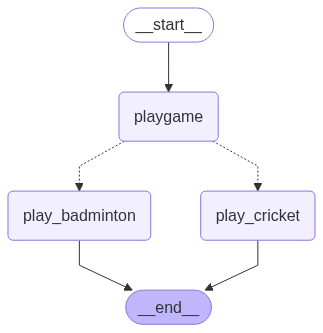

In [11]:
graph = StateGraph(PydanticState)

graph.add_node("playgame", play_game)
graph.add_node("play_cricket", play_cricket)
graph.add_node("play_badminton", play_badminton)


# Add edges between nodes
graph.add_edge(START, "playgame")
graph.add_conditional_edges("playgame",decide_play)
graph.add_edge("play_cricket", END)
graph.add_edge("play_badminton", END)

graph_build = graph.compile()


display(Image(graph_build.get_graph().draw_mermaid_png()))

In [28]:
graph_build.invoke(PydanticState(name="Simant",timestamp=datetime.now()))

-------------play game node called------------
-------------decide play node called------------
-------------play cricket node called------------


{'name': 'Simant wants to play cricket',
 'game': 'cricket',
 'timestamp': datetime.datetime(2025, 7, 21, 13, 18, 3, 49771)}

In [32]:
#pydantic also supports validation and serialization, making it a powerful tool for managing state in complex applications.

# You can also use Pydantic's features to validate the state before invoking the graph
# For example, you can ensure that the name is not empty and the game is one of the allowed values
state = PydanticState(name=123, timestamp=datetime.now())
graph_build.invoke(state)

ValidationError: 1 validation error for PydanticState
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type